In [7]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [8]:
# load data
transactions = pd.read_csv('customer_transaction_sanctions.csv')

In [49]:
# view table
transactions.head()

,customer_id,name,dob,country,occupation,account_open_date,kyc_status,customer_type,transaction_id,date,amount_usd,transaction_country,merchant,channel,risk_level
0,C0001,allison hill,1954-09-13,mexico,teacher,2021-09-12,verified,retail,T00368,2024-08-07,4715.15,us,bestbuy,wire,NaN
1,C0001,allison hill,1954-09-13,mexico,teacher,2021-09-12,verified,retail,T00875,2025-04-19,51.43,canada,luxury retailer,in-person,NaN
2,C0001,allison hill,1954-09-13,mexico,teacher,2021-09-12,verified,retail,T01157,2024-08-14,345.39,brazil,ebay,wire,NaN
3,C0002,megan mcclain,1945-06-05,us,business owner,2024-02-06,verified,retail,T01159,2025/05/10,4109.01,uk,not recorded,wire,NaN
4,C0003,brandon hall,1980-06-24,uk,teacher,2020-09-26,verified,retail,T00475,2024-10-29,150029.00,mexico,amazon,in-person,NaN


In [4]:
# view columns
transactions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1522 entries, 0 to 1521
Data columns (total 15 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   customer_id          1522 non-null   object 
 1   name                 1522 non-null   object 
 2   dob                  1442 non-null   object 
 3   country              1522 non-null   object 
 4   occupation           1522 non-null   object 
 5   account_open_date    1522 non-null   object 
 6   kyc_status           1522 non-null   object 
 7   customer_type        1522 non-null   object 
 8   transaction_id       1500 non-null   object 
 9   date                 1500 non-null   object 
 10  amount_usd           1500 non-null   float64
 11  transaction_country  1500 non-null   object 
 12  merchant             1500 non-null   object 
 13  channel              1500 non-null   object 
 14  risk_level           29 non-null     object 
dtypes: float64(1), object(14)
memory usage

In [79]:
# format date column
transactions['date'] = pd.to_datetime(transactions['date'], errors='coerce')

In [71]:
# earliest transaction recorded
print('The Earliest Transaction Date:')
print(transactions['date'].min())

The Earliest Transaction Date:
2024-07-06 00:00:00


In [60]:
# latest transaction recorded
print('The Latest Transaction Date:')
print(transactions['date'].max())

The Latest Transaction Date:
2025-07-06 00:00:00


In [46]:
# stats on amounts of transactions
display(transactions['amount_usd'].describe())

count      1500.000000
mean       4268.434167
std       30153.983528
min           9.290000
25%         547.205000
50%        1432.875000
75%        2863.830000
max      828079.000000
Name: amount_usd, dtype: float64

In [112]:
# average spending
customer_type = transactions.groupby(['customer_type'])['amount_usd'].mean().reset_index()

print('Average by Customer Type:')
print(customer_type)

Average by Customer Type:
  customer_type   amount_usd
0     corporate  2570.294218
1        retail  6108.085778


In [9]:
# top customers 
top_customers = transactions.groupby(['customer_id', 'name'])['amount_usd'].sum().reset_index()
top_customers = top_customers.sort_values(by='amount_usd', ascending=False).head(10)

print('Top 10 Customers by Transaction Volume:')
print(top_customers)

Top 10 Customers by Transaction Volume:
    customer_id               name  amount_usd
332       C0333         amber rios   843288.36
110       C0111  mr. michael yates   396382.90
179       C0180      breanna jones   358152.79
433       C0434        carmen bond   316858.40
430       C0431     melanie larson   307356.79
128       C0129      jessica gross   274913.40
234       C0235    richard chapman   243588.47
258       C0259       mark johnson   165164.55
2         C0003       brandon hall   154024.94
396       C0397         tami salas   149323.04


In [23]:
# distribution of transactions by channel
transactions_by_channel = transactions['channel'].value_counts()

print('Transactions by Channel:')
print(transactions_by_channel)

Transactions by Channel:
channel
in-person       492
online          489
wire            474
not recorded     45
Name: count, dtype: int64


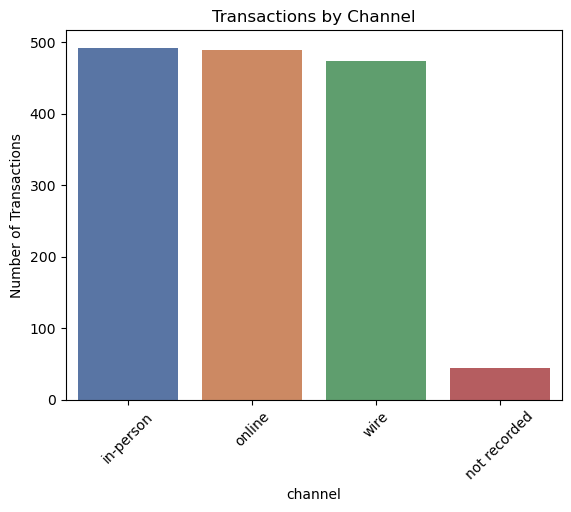

In [100]:
# visual for transactions by channel
sns.countplot(data=transactions, x='channel',palette='deep', order=transactions['channel'].value_counts().index)
plt.title('Transactions by Channel')
plt.xticks(rotation=45)
plt.ylabel('Number of Transactions')
plt.show()

In [3]:
# average spending per channel
spending_channel = transactions.groupby(['channel'])['amount_usd'].mean().reset_index()

print('Average Spending by Channel:')
print(spending_channel)

Average Spending by Channel:
        channel   amount_usd
0     in-person  3602.800163
1  not recorded  1816.006000
2        online  2696.331268
3          wire  6814.023861


In [28]:
# transactions by country
transactions_by_country = transactions['country'].value_counts()

print("Transactions by Country:")
print(transactions_by_country)

Transactions by Country:
country
us         571
uk         342
mexico     170
canada     163
germany     77
brazil      67
russia      66
china       66
Name: count, dtype: int64


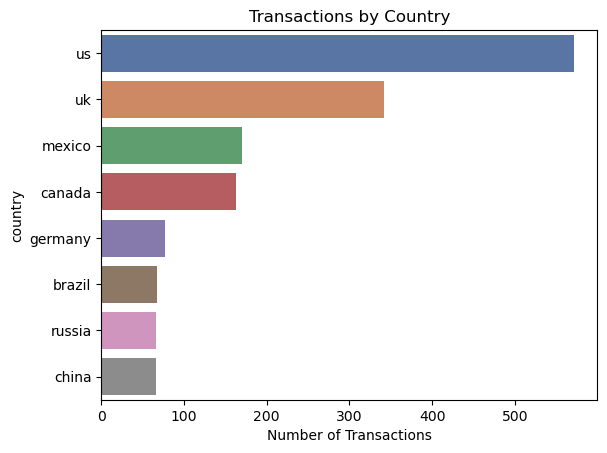

In [76]:
# visual for transactions by country
sns.countplot(data=transactions, y='country', palette='deep', order=transactions['country'].value_counts().index)
plt.title('Transactions by Country')
plt.xlabel('Number of Transactions')
plt.show()

In [4]:
# average spending per country
spending_country = transactions.groupby(['country'])['amount_usd'].mean().reset_index()

print('Average Spending by Channel:')
print(spending_country)

Average Spending by Channel:
   country   amount_usd
0   brazil  2631.562273
1   canada  2022.976708
2    china  1969.543077
3  germany  4135.035584
4   mexico  1763.028810
5   russia  4571.590154
6       uk  5477.629911
7       us  5378.695964


In [17]:
# distribution of risk level
transactions['risk_level'].value_counts()

risk_level
High      17
Low        7
Medium     5
Name: count, dtype: int64

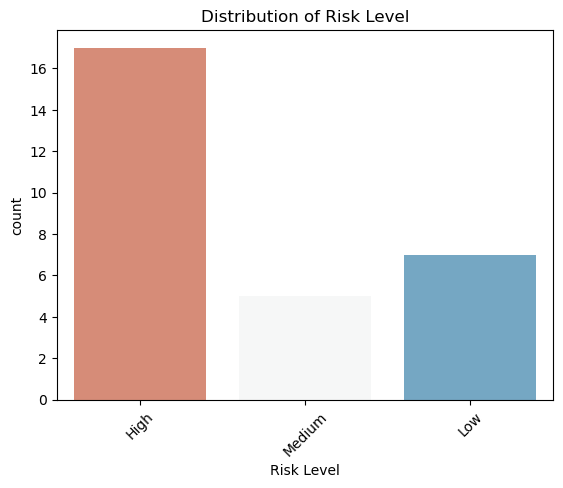

In [106]:
# visual for distribution of risk level
sns.countplot(data=transactions, x='risk_level', palette='RdBu', order=['High', 'Medium', 'Low'])
plt.title('Distribution of Risk Level')
plt.xlabel('Risk Level')
plt.xticks(rotation=45)
plt.show()

In [20]:
# risk level by country 
country_risk = transactions.groupby(['country','risk_level']).size().unstack(fill_value=0).reset_index()

print('Risk Level by Country:')
print(country_risk)

Risk Level by Country:
risk_level country  High  Low  Medium
0           brazil     0    1       0
1            china     3    0       0
2           russia     3    0       0
3               uk    11    6       4
4               us     0    0       1


In [5]:
# risk level by customer type 
customer_type_risk = transactions.groupby(['customer_type','risk_level']).size().unstack(fill_value=0).reset_index()

print('Risk Level by Customer Type:')
print(customer_type_risk)

Risk Level by Customer Type:
risk_level customer_type  High  Low  Medium
0              corporate     9    6       1
1                 retail     8    1       4


In [6]:
# risk level by channel 
channel_risk = transactions.groupby(['channel','risk_level']).size().unstack(fill_value=0).reset_index()

print('Risk Level by Channel:')
print(channel_risk)

Risk Level by Channel:
risk_level       channel  High  Low  Medium
0              in-person     4    4       0
1           not recorded     1    0       0
2                 online     7    1       3
3                   wire     4    2       2


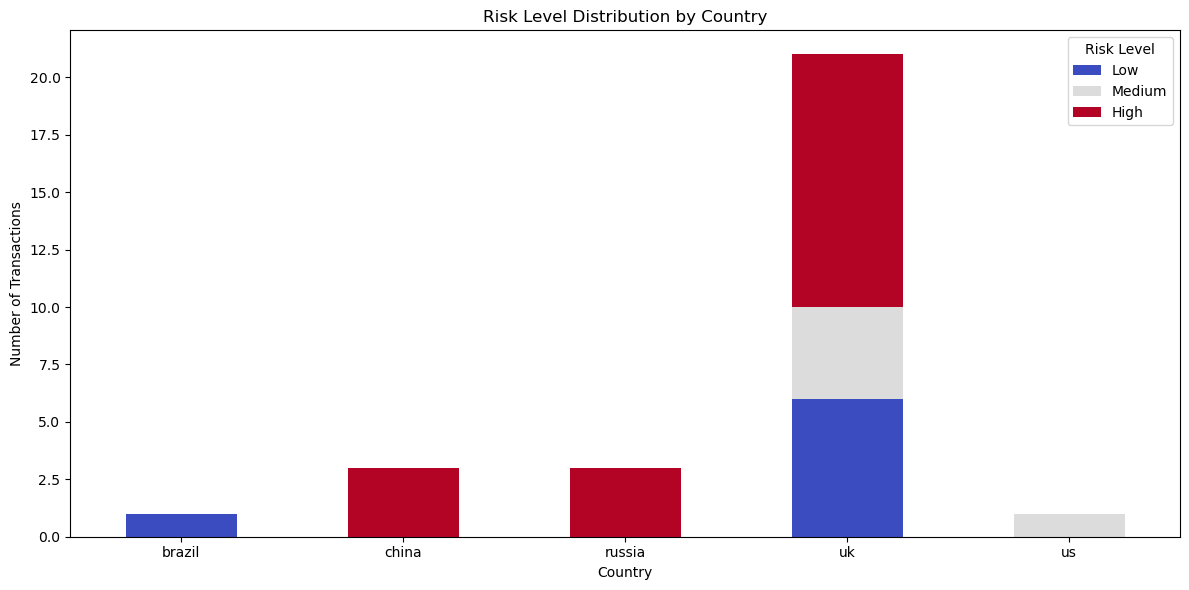

In [57]:
country_risk.set_index('country')[['Low', 'Medium', 'High']].plot(
    kind='bar',
    stacked=True,
    figsize=(12, 6),
    colormap='coolwarm'
)

plt.title('Risk Level Distribution by Country')
plt.xlabel('Country')
plt.ylabel('Number of Transactions')
plt.xticks(rotation=0, ha='center')
plt.legend(title='Risk Level')
plt.tight_layout()
plt.show()

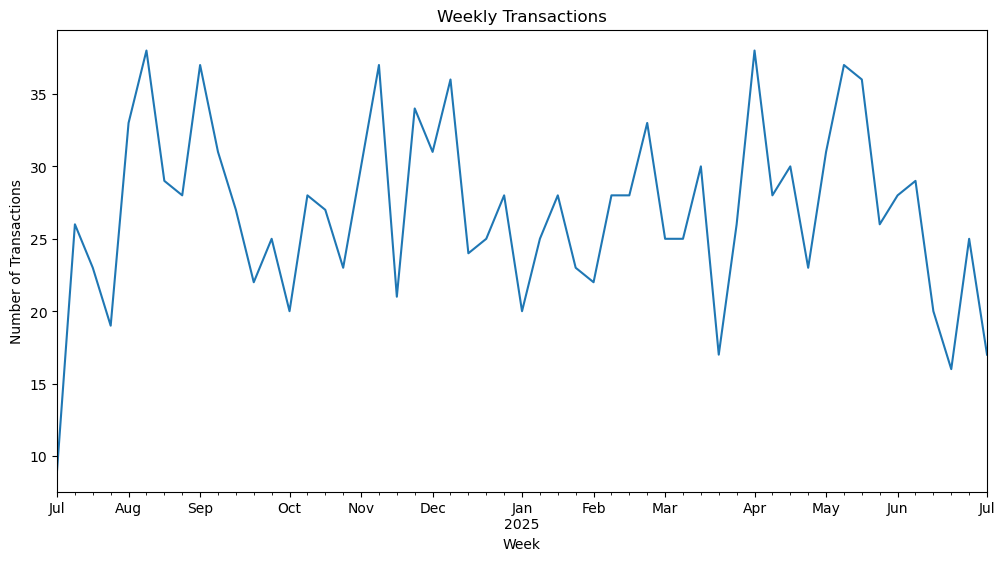

In [80]:
# transactions per week
transactions_weekly = transactions.resample('W', on='date')['transaction_id'].count()

transactions_weekly.plot(kind='line', figsize=(12, 6), title='Weekly Transactions')
plt.xlabel('Week')
plt.ylabel('Number of Transactions')
plt.show()

In [6]:
# check for outliers
Q1 = transactions['amount_usd'].quantile(0.25)
Q3 = transactions['amount_usd'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

outliers = transactions[(transactions['amount_usd'] < lower_bound) | (transactions['amount_usd'] > upper_bound)]
print(f"Outliers detected: {len(outliers)}")

Outliers detected: 79


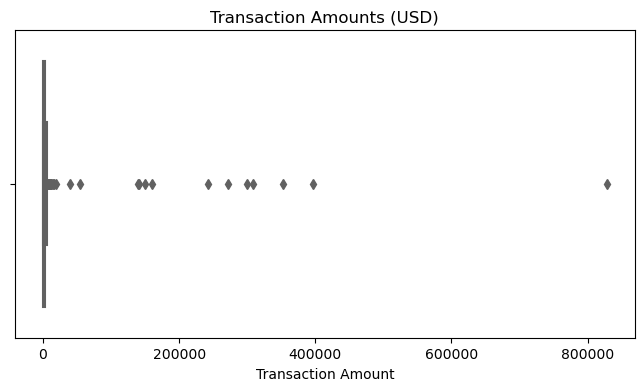

In [108]:
# plot distribution
plt.figure(figsize=(8, 4))
sns.boxplot(x=transactions["amount_usd"], palette='Blues_r')
plt.title("Transaction Amounts (USD)")
plt.xlabel('Transaction Amount')
plt.show()